# Statement of the Problem 3: ACCURACY OF THE **SEIR-SEI** MODEL IN FORECASTING DENGUE CASES BASED ON HISTORICAL DATA

## PYTHON TOOLS NEEDED

In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt

In [30]:
fc = pd.read_csv('SEIR-SEI.csv')
ad = pd.read_csv('2024-dengue-cases-cavite.csv')

In [31]:
forecast = fc['Ih'].round()
actual_data = ad.query('Month == "January" | Month == "February" | Month == "March"')['Cases'].values

C:\Users\Admin\AppData\Local\Temp\ipykernel_18644\4140704586.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


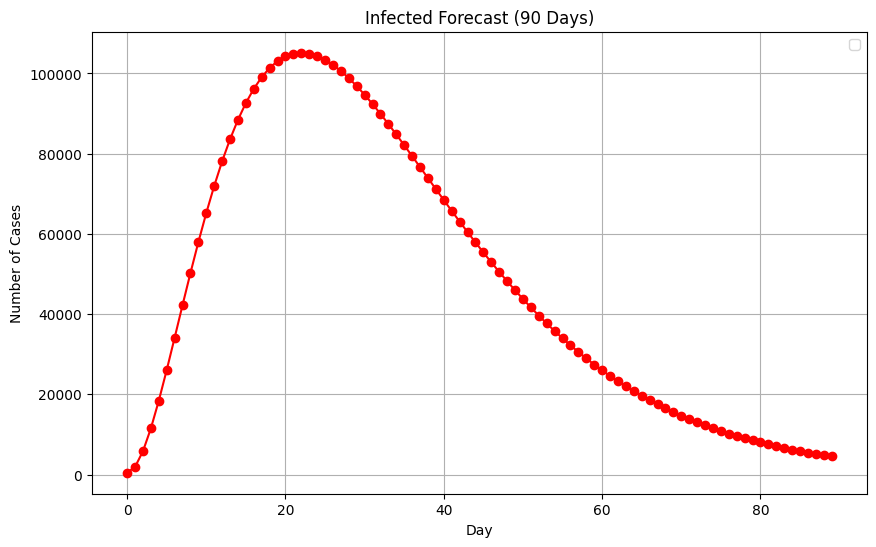

In [32]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, 90), forecast, marker="o", linestyle='-', color='red')
plt.title("Infected Forecast (90 Days)")
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18644\4288211212.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


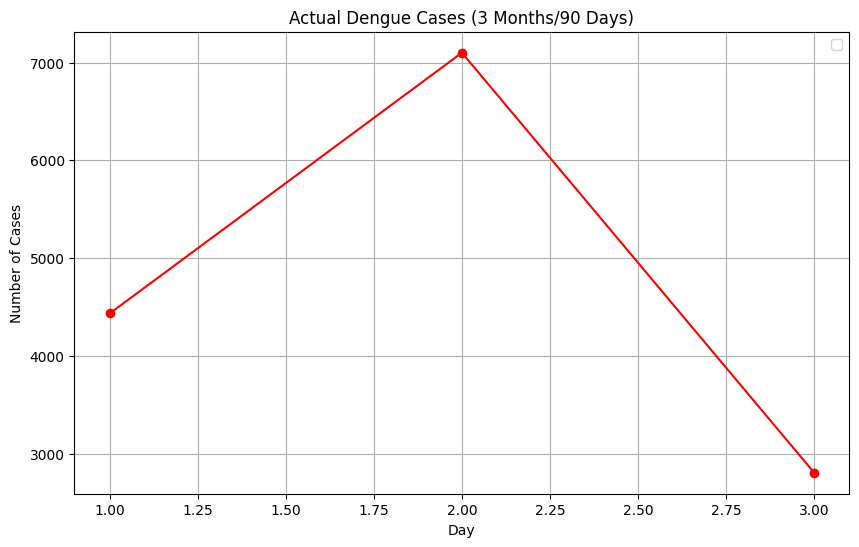

In [33]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, 4), actual_data, marker="o", linestyle='-', color='red')
plt.title("Actual Dengue Cases (3 Months/90 Days)")
plt.xlabel("Day")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Function to evaluate model accuracy
def evaluate_model(y_true, y_pred):
    """Calculates RMSE and R-squared."""
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    r_squared = r2_score(y_true, y_pred)
    return rmse, r_squared

In [ ]:
print("-" * 30)
print("Model Validation Results (SOP 3)")

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"MAE: {mae:.2f}")

# Thresholds for "good" performance (you can adjust as needed)
if r2 > 0.7 and rmse < np.mean(actual_2024)*0.3:
    print("Conclusion: The SEIR-SEI model provides an ACCURATE forecast of dengue cases.")
    print("High R² and low RMSE indicate strong predictive performance.")
else:
    print("Conclusion: The SEIR-SEI model does NOT provide a highly accurate forecast.")
    print("Error metrics suggest the model may need refinement or additional factors.")
